# **Analyzing Trends with COVID-19**

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
data= pd.read_csv(r'/content/covid_19_clean_complete.csv')
data

Province/State         Country/Region        Lat       Long        Date  \
0                NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1                NaN                Albania  41.153300  20.168300  2020-01-22   
2                NaN                Algeria  28.033900   1.659600  2020-01-22   
3                NaN                Andorra  42.506300   1.521800  2020-01-22   
4                NaN                 Angola -11.202700  17.873900  2020-01-22   
...              ...                    ...        ...        ...         ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065            NaN                Comoros -11.645500  43.333300  2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600  2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

# **EDA- Exploratory Data Analysis**

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [61]:
data['Date']= pd.to_datetime(data['Date'],format='%Y-%m-%d')

In [62]:
data.describe()

Lat          Long                 Date     Confirmed  \
count  49068.000000  49068.000000                49068  4.906800e+04   
mean      21.433730     23.528236  2020-04-24 12:00:00  1.688490e+04   
min      -51.796300   -135.000000  2020-01-22 00:00:00  0.000000e+00   
25%        7.873054    -15.310100  2020-03-08 18:00:00  4.000000e+00   
50%       23.634500     21.745300  2020-04-24 12:00:00  1.680000e+02   
75%       41.204380     80.771797  2020-06-10 06:00:00  1.518250e+03   
max       71.706900    178.065000  2020-07-27 00:00:00  4.290259e+06   
std       24.950320     70.442740                  NaN  1.273002e+05   

              Deaths     Recovered        Active  
count   49068.000000  4.906800e+04  4.906800e+04  
mean      884.179160  7.915713e+03  8.085012e+03  
min         0.000000  0.000000e+00 -1.400000e+01  
25%         0.000000  0.000000e+00  0.000000e+00  
50%         2.000000  2.900000e+01  2.600000e+01  
75%        30.000000  6.660000e+02  6.060000e+02  
max    148011.000000  1.846641e+06  2.816444e+06  
std      6313.584411  5.480092e+04  7.625890e+04

In [63]:
data.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [64]:
# we connot remove a huge amount of data so we will replace null values with 'NA'
data['Province/State'].fillna('NA',inplace=True)

<ipython-input-64-3bac3bbb3563>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [65]:
data.duplicated().sum()

0

In [66]:
data.set_index('Date',inplace=True)
data

Province/State         Country/Region        Lat       Long  \
Date                                                                     
2020-01-22             NA            Afghanistan  33.939110  67.709953   
2020-01-22             NA                Albania  41.153300  20.168300   
2020-01-22             NA                Algeria  28.033900   1.659600   
2020-01-22             NA                Andorra  42.506300   1.521800   
2020-01-22             NA                 Angola -11.202700  17.873900   
...                   ...                    ...        ...        ...   
2020-07-27             NA  Sao Tome and Principe   0.186400   6.613100   
2020-07-27             NA                  Yemen  15.552727  48.516388   
2020-07-27             NA                Comoros -11.645500  43.333300   
2020-07-27             NA             Tajikistan  38.861000  71.276100   
2020-07-27             NA                Lesotho -29.610000  28.233600   

            Confirmed  Deaths  Recovered  Active             WHO Region  
Date                                                                     
2020-01-22          0       0          0       0  Eastern Mediterranean  
2020-01-22          0       0          0       0                 Europe  
2020-01-22          0       0          0       0                 Africa  
2020-01-22          0       0          0       0                 Europe  
2020-01-22          0       0          0       0                 Africa  
...               ...     ...        ...     ...                    ...  
2020-07-27        865      14        734     117                 Africa  
2020-07-27       1691     483        833     375  Eastern Mediterranean  
2020-07-27        354       7        328      19                 Africa  
2020-07-27       7235      60       6028    1147                 Europe  
2020-07-27        505      12        128     365                 Africa  

[49068 rows x 9 columns]

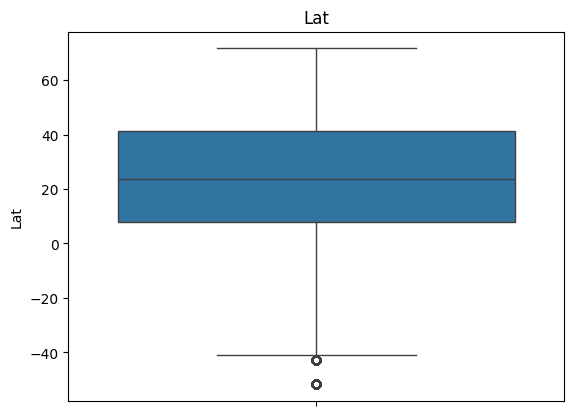

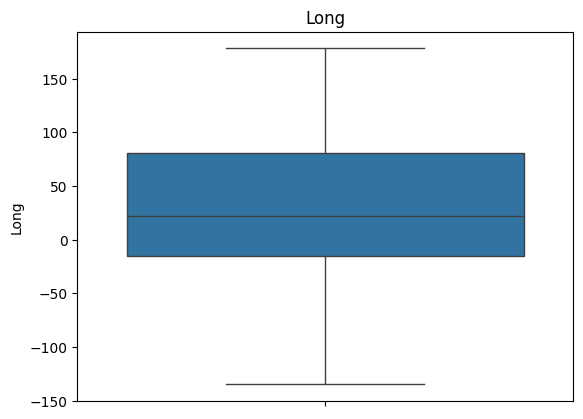

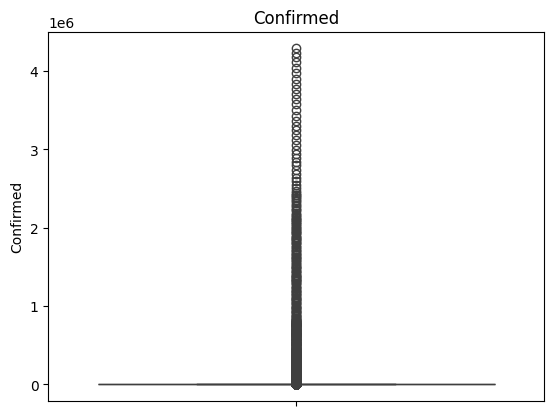

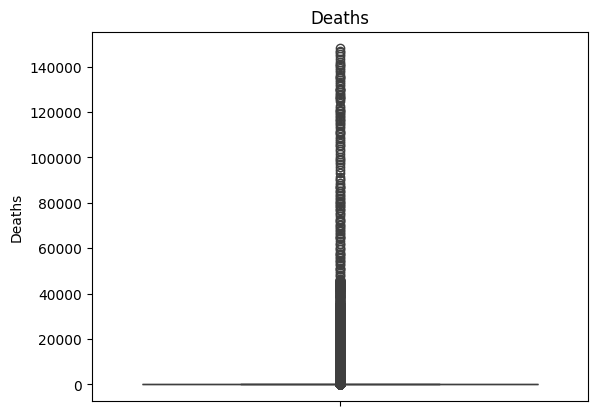

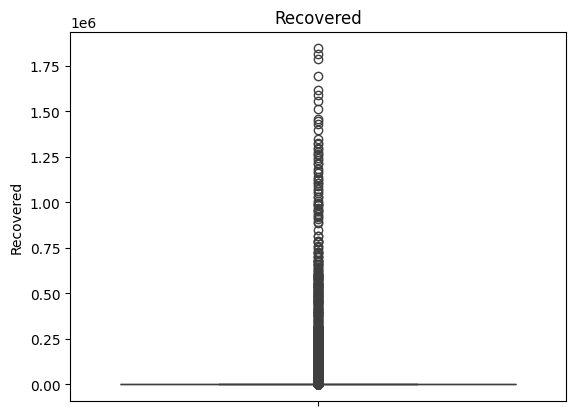

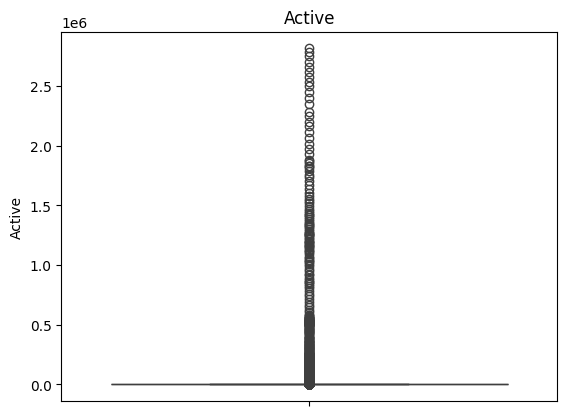

In [67]:
# Outlier Analysis
for x in data.columns:
  if data[x].dtype!='object':
    sns.boxplot(data[x])
    plt.title(x)
    plt.show()

# **Visualization**

In [68]:
#visualize the impact and analyze the trend of rate of infection and recovery by using plotly (visualization library) to create interactive visualizations.


import plotly.express as px

fig= px.line(data,x=data.index,y=['Confirmed','Recovered','Deaths'])
fig.update_layout(xaxis_title='Date',yaxis_title='Number of Cases',title='Trend of Confirmed Cases, Recoveries, and Deaths Over Time')
fig.show()

# **Model Building (Facebook Prophet)**

In [ ]:
# pip install prophet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprzcya8a5/43ssj12z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprzcya8a5/uhmhx4r6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8129', 'data', 'file=/tmp/tmprzcya8a5/43ssj12z.json', 'init=/tmp/tmprzcya8a5/uhmhx4r6.json', 'output', 'file=/tmp/tmprzcya8a5/prophet_modelg2e8vwlo/prophet_model-20241216102710.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:27:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:27:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


            ds          yhat     yhat_lower     yhat_upper
0   2020-01-22   -322.777369 -151665.140980  148419.379733
1   2020-01-23   -243.075035 -161301.793649  161239.080113
2   2020-01-24   -157.722343 -165241.615326  149580.810321
3   2020-01-25    -90.517586 -158317.155603  155832.274169
4   2020-01-26    -68.259865 -170216.600539  161852.409252
..         ...           ...            ...            ...
190 2020-07-30  63800.816234  -90773.256679  216098.386930
191 2020-07-31  64606.827914  -92025.356729  219732.245045
192 2020-08-01  65394.691659  -94002.357524  221174.345867
193 2020-08-02  66137.608369  -98072.534980  221508.245163
194 2020-08-03  66865.726580  -89657.309092  231917.517794

[195 rows x 4 columns]


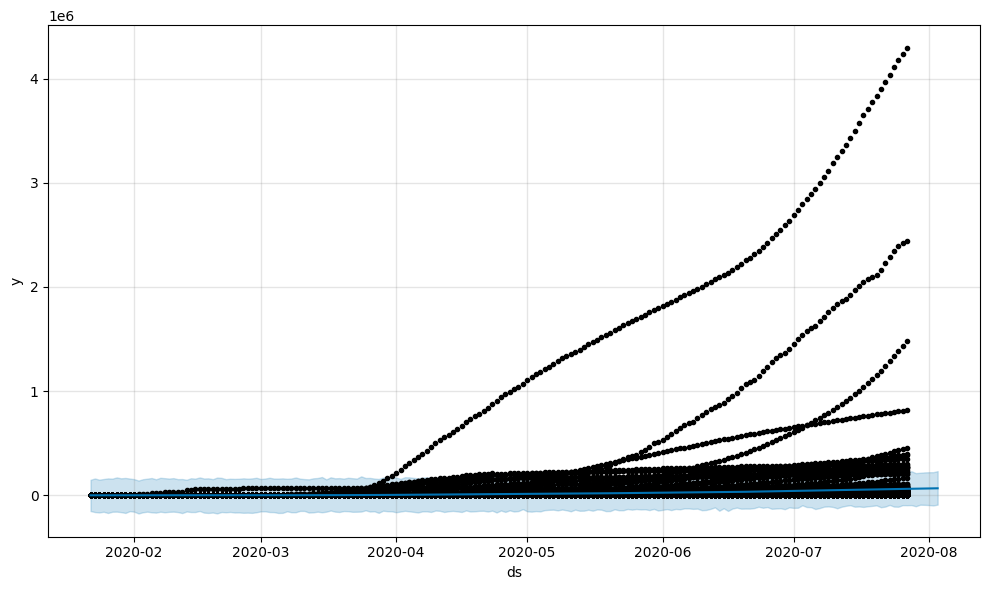

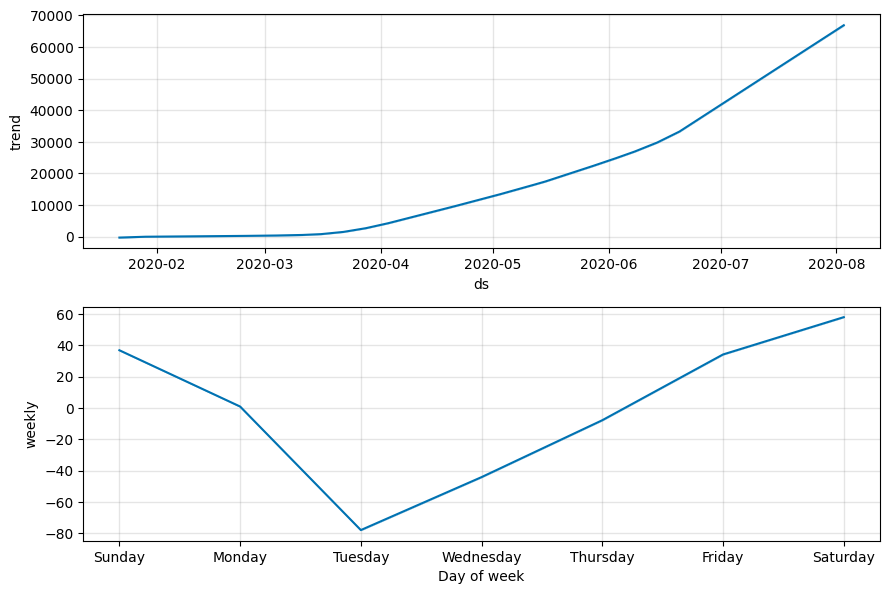

In [69]:
# Use Facebook prophet library to make time series model to make predictions about the number of cases expected a week in future based on the current trends.

# ppropriate data for prophet i.e. dataframe must have 'ds' and 'y' columns with dates and values respectively. We will use Confirmed column to predict values for next week.
df= data.reset_index()[['Date','Confirmed']].rename(columns={'Date':'ds','Confirmed':'y'})

# building model
from prophet import Prophet

model=Prophet()
model.fit(df)

# Create future dates for prediction (one week into the future)
future_dates= model.make_future_dataframe(periods=7)

# Make predictions
forecast= model.predict(future_dates)

# Display the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# Plot forecast
fig1= model.plot(forecast)
plt.show()

fig2= model.plot_components(forecast)
plt.show()



In [70]:
forecast

ds         trend     yhat_lower     yhat_upper   trend_lower  \
0   2020-01-22   -278.645458 -151665.140980  148419.379733   -278.645458   
1   2020-01-23   -235.260156 -161301.793649  161239.080113   -235.260156   
2   2020-01-24   -191.874855 -165241.615326  149580.810321   -191.874855   
3   2020-01-25   -148.489553 -158317.155603  155832.274169   -148.489553   
4   2020-01-26   -105.104252 -170216.600539  161852.409252   -105.104252   
..         ...           ...            ...            ...           ...   
190 2020-07-30  63808.631113  -90773.256679  216098.386930  63783.009818   
191 2020-07-31  64572.675402  -92025.356729  219732.245045  64522.347627   
192 2020-08-01  65336.719692  -94002.357524  221174.345867  65260.396954   
193 2020-08-02  66100.763982  -98072.534980  221508.245163  65995.846220   
194 2020-08-03  66864.808272  -89657.309092  231917.517794  66715.142580   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0     -278.645458      -44.131911            -44.131911            -44.131911   
1     -235.260156       -7.814878             -7.814878             -7.814878   
2     -191.874855       34.152512             34.152512             34.152512   
3     -148.489553       57.971967             57.971967             57.971967   
4     -105.104252       36.844386             36.844386             36.844386   
..            ...             ...                   ...                   ...   
190  63833.685862       -7.814878             -7.814878             -7.814878   
191  64624.234474       34.152512             34.152512             34.152512   
192  65426.075366       57.971967             57.971967             57.971967   
193  66227.901289       36.844386             36.844386             36.844386   
194  67047.885179        0.918308              0.918308              0.918308   

        weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0   -44.131911    -44.131911    -44.131911                   0.0   
1    -7.814878     -7.814878     -7.814878                   0.0   
2    34.152512     34.152512     34.152512                   0.0   
3    57.971967     57.971967     57.971967                   0.0   
4    36.844386     36.844386     36.844386                   0.0   
..         ...           ...           ...                   ...   
190  -7.814878     -7.814878     -7.814878                   0.0   
191  34.152512     34.152512     34.152512                   0.0   
192  57.971967     57.971967     57.971967                   0.0   
193  36.844386     36.844386     36.844386                   0.0   
194   0.918308      0.918308      0.918308                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0   -322.777369  
1                           0.0                         0.0   -243.075035  
2                           0.0                         0.0   -157.722343  
3                           0.0                         0.0    -90.517586  
4                           0.0                         0.0    -68.259865  
..                          ...                         ...           ...  
190                         0.0                         0.0  63800.816234  
191                         0.0                         0.0  64606.827914  
192                         0.0                         0.0  65394.691659  
193                         0.0                         0.0  66137.608369  
194                         0.0                         0.0  66865.726580  

[195 rows x 16 columns]

# **Time Series Forecasting**

**ADFuller test for stationarity**

In [71]:
from statsmodels.tsa.stattools import adfuller
pval= adfuller(data['Confirmed'])
pval[1]

0.0

In [72]:
log_df= np.log(data['Confirmed'])
log_df.dropna(inplace=True)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning:

divide by zero encountered in log



In [73]:
mean=log_df.rolling(window=12).mean()
new_df=log_df-mean
new_df.dropna(inplace=True)

In [74]:
p_val= adfuller(new_df)
p_val[1]

0.0

**Model Building**

In [15]:
#pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.3 MB/s eta 0:00:00


In [16]:
# to know the hyperparameter values for ARIMA model

from pmdarima import auto_arima
arima1= auto_arima(data['Confirmed'],seasonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=61.94 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1326578.588, Time=1.57 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1309563.271, Time=1.60 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=14.54 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1326576.588, Time=0.91 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1305158.118, Time=3.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1302456.307, Time=7.73 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1300536.076, Time=14.90 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1299063.184, Time=9.30 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=92.70 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=74.51 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=1299061.184, Time=7.77 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=1300534.076, Time=7.25 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=51.38 sec
 ARIMA(4,1,1)(0,0,0)[0]  

In [75]:
train= data['Confirmed'].iloc[:500]
test= data['Confirmed'].iloc[48568:]

In [76]:
# Model Building ARIMA
from statsmodels.tsa.arima.model import ARIMA
model= ARIMA(train,order=(5,1,0))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:              Confirmed   No. Observations:                  500
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2410.956
Date:                Mon, 16 Dec 2024   AIC                           4833.913
Time:                        10:27:31   BIC                           4859.188
Sample:                             0   HQIC                          4843.832
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8259      0.018    -44.878      0.000      -0.862      -0.790
ar.L2         -0.6597      0.023    -28.815      0.000      -0.705      -0.615
ar.L3         -0.4954      0.024    -20.275      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



<Axes: xlabel='Date'>

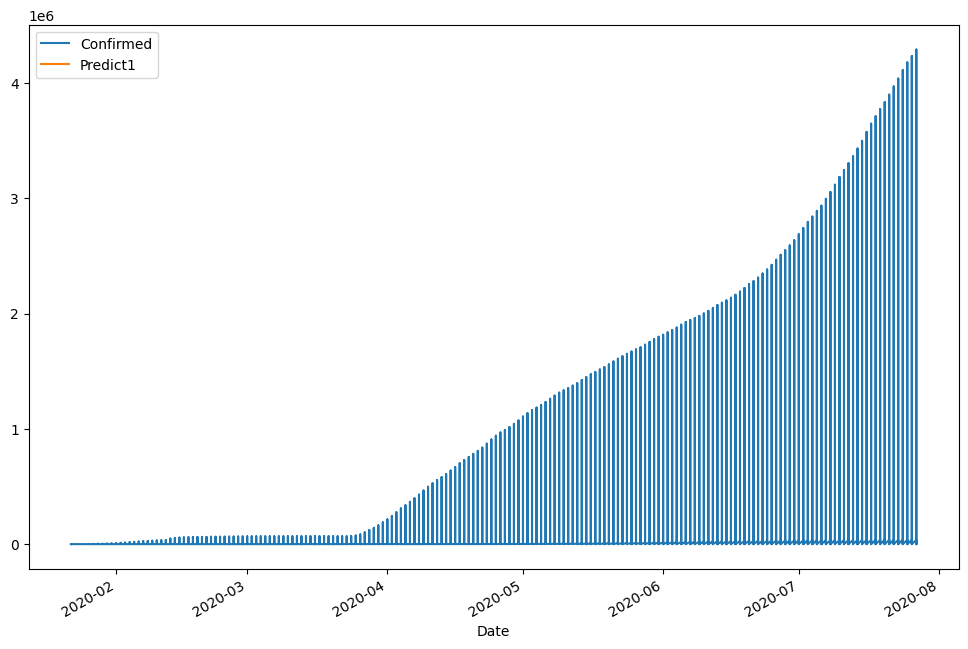

In [86]:
# Predictions

data['Predict1']=model.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
data[['Confirmed','Predict1']].plot(figsize=(12,8))

In [87]:
# forecasting for next one week

forecast= model.forecast(steps=7)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



<Axes: xlabel='Date'>

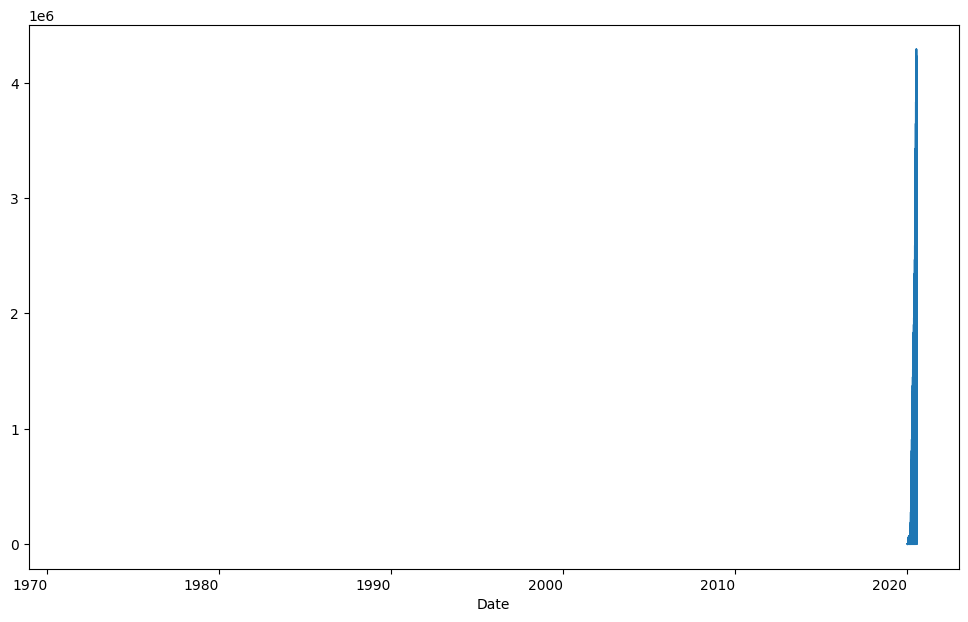

In [79]:
data['Confirmed'].plot(figsize=(12,8))
forecast.plot()

<Axes: xlabel='Date'>

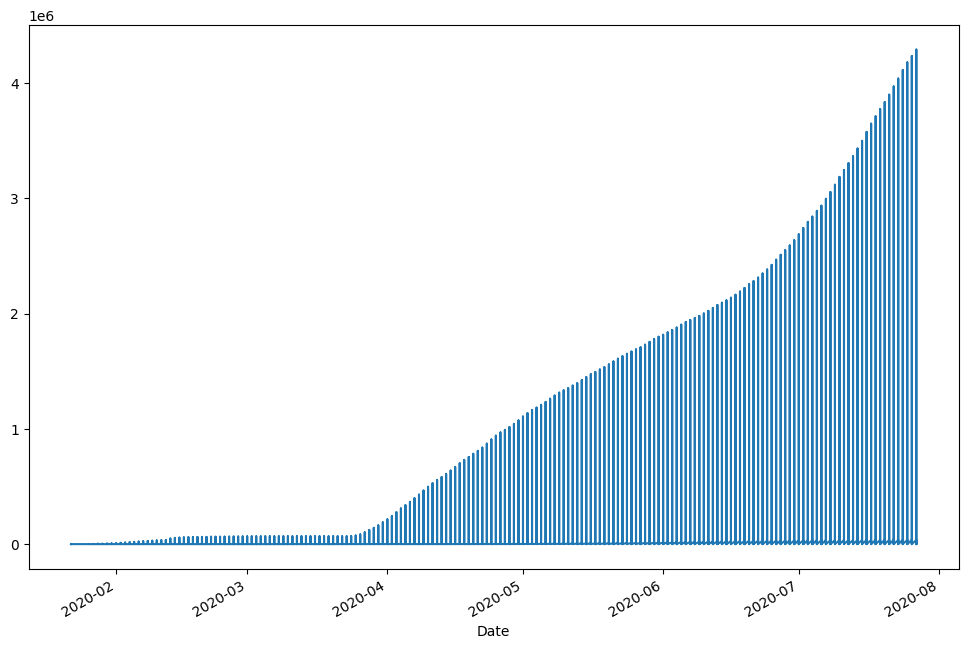

In [89]:
data['Confirmed'].plot(figsize=(12,8))

<Axes: >

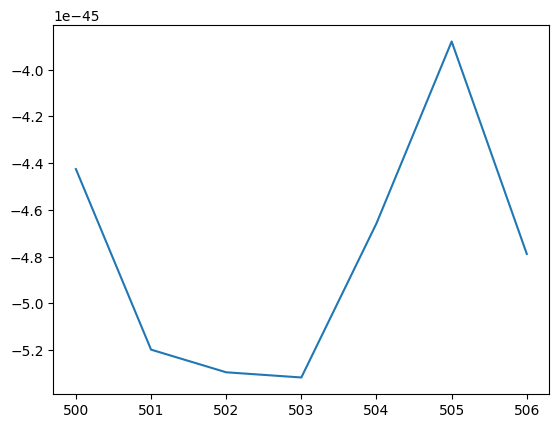

In [81]:
forecast.plot()

**SARIMAX Model**

In [82]:
# building model SARIMAX

from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train,order=(5,1,0),seasonal_order=(5,1,0,7),enforce_stationarity=False,enforce_invertibility=False)
model=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



<Axes: xlabel='Date'>

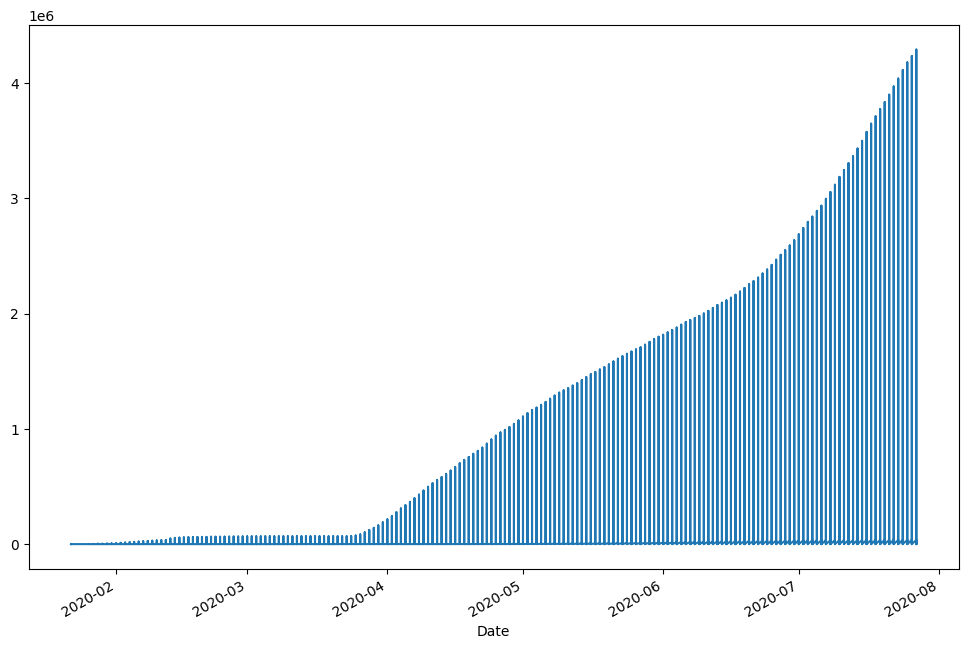

In [83]:
# Predictions
data['Predict2']= model.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)
data['Confirmed'].plot(figsize=(12,8))
data['Predict2'].plot()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



<Axes: xlabel='Date'>

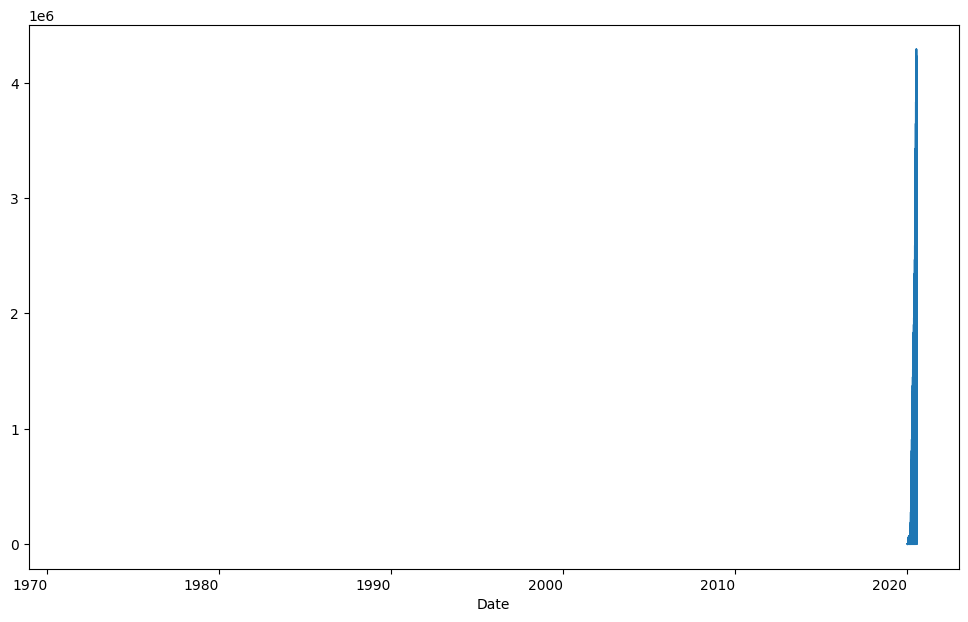

In [84]:
# Forecasting
forecast= model.forecast(steps=7)
data['Confirmed'].plot(figsize=(12,8))
forecast.plot()

<Axes: >

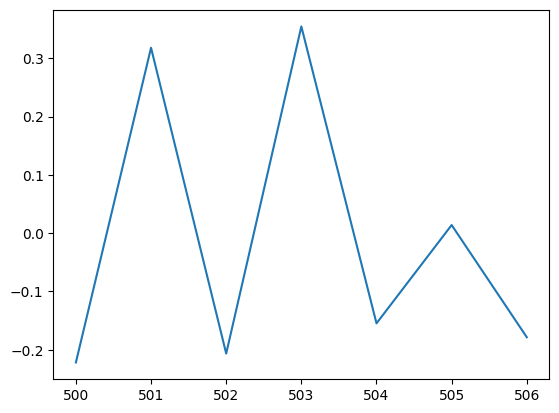

In [85]:
forecast.plot()